#### Loading Data

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/cats_and_dogs_filtered.zip'

In [102]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'  # Set to grayscale
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'  # Set to grayscale
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [104]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.918.jpg', 'cat.535.jpg', 'cat.108.jpg', 'cat.971.jpg', 'cat.553.jpg', 'cat.291.jpg', 'cat.966.jpg', 'cat.269.jpg', 'cat.556.jpg', 'cat.793.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [106]:
im = mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0]))
im.shape

(499, 298, 3)

#### leNet Architecture 

In [79]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
lenetcnn = Sequential()
lenetcnn.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh',padding="same",input_shape=(28,28,1)))
lenetcnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
lenetcnn.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh',padding='valid'))
lenetcnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
lenetcnn.add(Flatten())
lenetcnn.add(Dense(120, activation='tanh'))
lenetcnn.add(Dense(84, activation='tanh'))
lenetcnn.add(Dense(1, activation='sigmoid'))
lenetcnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_202 (Conv2D)             │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_203 (Conv2D)             │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,941 (238.05 KB)

 Trainable params: 60,941 (238.05 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
lenetcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:

history = lenetcnn.fit(train_generator, epochs=15, validation_data=val_generator)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.5191 - loss: 0.7172 - val_accuracy: 0.5090 - val_loss: 0.6908
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.6066 - loss: 0.6635 - val_accuracy: 0.6220 - val_loss: 0.6555
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.6398 - loss: 0.6440 - val_accuracy: 0.6350 - val_loss: 0.6542
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.6605 - loss: 0.6275 - val_accuracy: 0.6070 - val_loss: 0.6595
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.7013 - loss: 0.5907 - val_accuracy: 0.6270 - val_loss: 0.6680
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.7013 - loss: 0.5660 - val_accuracy: 0.6150 - val_loss: 0.6731
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.7624 - loss: 0.5041 - val_accuracy: 0.6080 - val_loss: 0.7377
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7835 - loss: 0.4792 - val_accuracy: 0.6280 - v

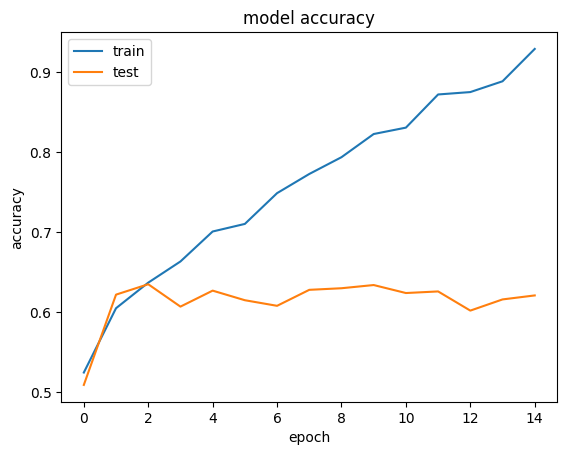

In [83]:
#plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

#### AlexNet architecture

In [84]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

alexnet = Sequential()
alexnet.add(Conv2D(96, kernel_size=(11, 11), strides=4,
                   padding='valid', activation='relu',
                   input_shape=(227, 227, 3),
                   kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))
alexnet.add(Conv2D(256, kernel_size=(5, 5), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))

alexnet.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(Conv2D(256, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))

alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dense(1000, activation='relu'))
alexnet.add(Dense(1, activation='sigmoid'))  

alexnet.summary()

optimizer = SGD(learning_rate=0.01, momentum=0.9)
alexnet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_204 (Conv2D)             │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_205 (Conv2D)             │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_206 (Conv2D)             │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_207 (Conv2D)             │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_208 (Conv2D)             │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,379,345 (237.96 MB)

 Trainable params: 62,379,345 (237.96 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
history = alexnet.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 420ms/step - accuracy: 0.4948 - loss: 0.8488 - val_accuracy: 0.5000 - val_loss: 0.6948
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 426ms/step - accuracy: 0.5332 - loss: 0.6888 - val_accuracy: 0.5590 - val_loss: 0.6864
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 411ms/step - accuracy: 0.5473 - loss: 0.6885 - val_accuracy: 0.5110 - val_loss: 0.6803
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 413ms/step - accuracy: 0.5523 - loss: 0.6870 - val_accuracy: 0.6160 - val_loss: 0.6721
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 411ms/step - accuracy: 0.5965 - loss: 0.6704 - val_accuracy: 0.6070 - val_loss: 0.6429
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 411ms/step - accuracy: 0.6035 - loss: 0.6524 - val_accuracy: 0.6440 - val_loss: 0.6479
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 409ms/step - accuracy: 0.5832 - loss: 0.6672 - val_accuracy: 0.6620 - val_loss: 0.6206
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 413ms/step - accuracy: 0.6244 - loss: 0.6416 - val_accu

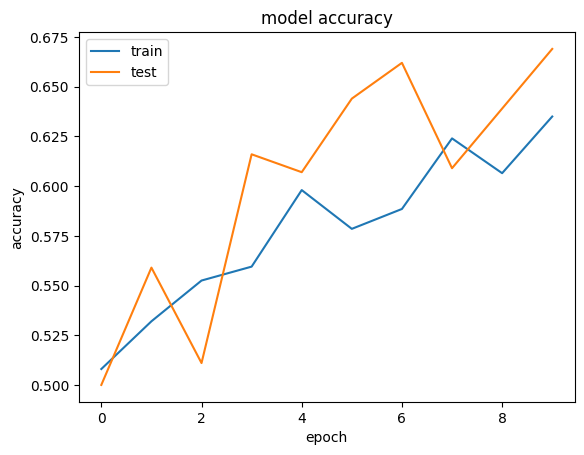

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


#### Loading and running Pre-Trained models on the same dataset

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,InceptionV3,ResNet50,EfficientNetB0,MobileNetV2

In [108]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary'
        )

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [113]:
# training all the models now
models = [VGG16,InceptionV3,ResNet50,EfficientNetB0,MobileNetV2]

results = []
def train_models(models):
  
  for model in models:
    base_model = model(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    name = model.__name__
    print(f"Model being trained is {name} \n")
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    # train only the top layers (which were randomly initialized)
    for layer in base_model.layers:
      layer.trainable = False

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    history = model.fit(train_generator,epochs=3,validation_data=validation_generator)

    #plotting the loss and accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    print("plots for model")
    fig,ax = plt.subplots(2,1,figsize=(10,10))
    ax[0].plot(acc,label='Training Accuracy')
    ax[0].plot(val_acc,label='Validation Accuracy')
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(loc='lower right')
    ax[0].set_title('Training and Validation Accuracy')
    ax[1].plot(loss,label='Training Loss')
    ax[1].plot(val_loss,label='Validation Loss')
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Loss")
    ax[1].legend(loc='upper right')
    ax[1].set_title('Training and Validation Loss')
    plt.show()

    #evaluating the model
    results.append({'model':name,'accuracy':history.history['accuracy'][-1],'val_accuracy':history.history['val_accuracy'][-1],'loss':history.history['loss'][-1],'val_loss':history.history['val_loss'][-1]})


Model being trained is VGG16 

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - accuracy: 0.6949 - loss: 0.5715 - val_accuracy: 0.8970 - val_loss: 0.2852
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 164ms/step - accuracy: 0.8855 - loss: 0.2797 - val_accuracy: 0.9200 - val_loss: 0.2277
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.9267 - loss: 0.2102 - val_accuracy: 0.8720 - val_loss: 0.2680
plots for model


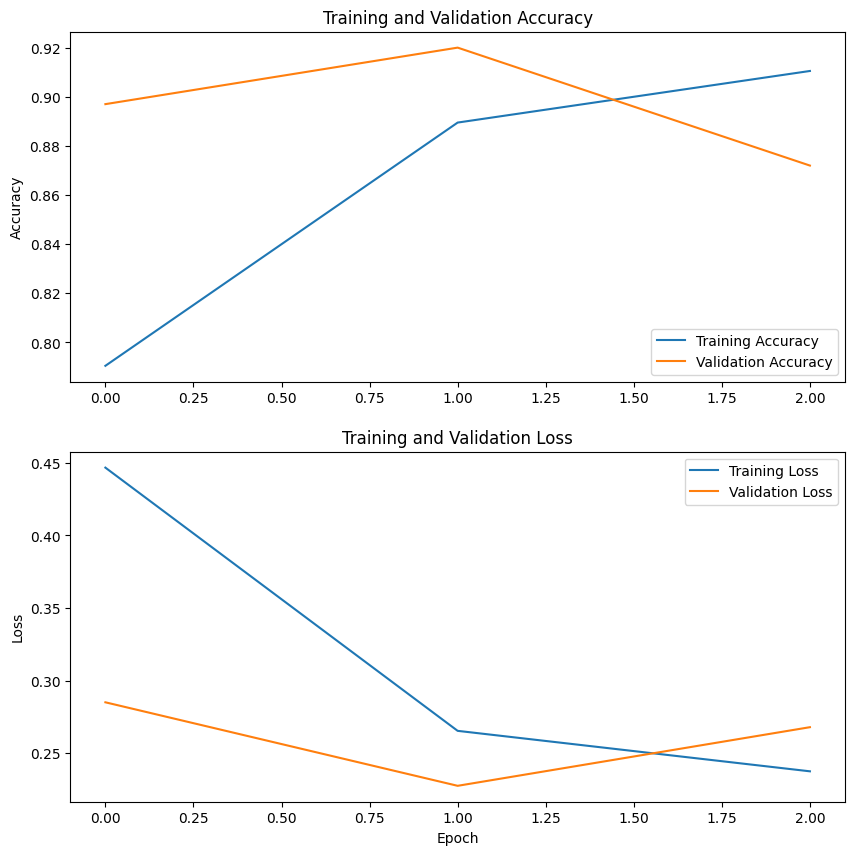

Model being trained is InceptionV3 

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.9189 - loss: 0.2388 - val_accuracy: 0.9840 - val_loss: 0.0649
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9848 - loss: 0.0391 - val_accuracy: 0.9810 - val_loss: 0.0824
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.9915 - loss: 0.0140 - val_accuracy: 0.9890 - val_loss: 0.0530
plots for model


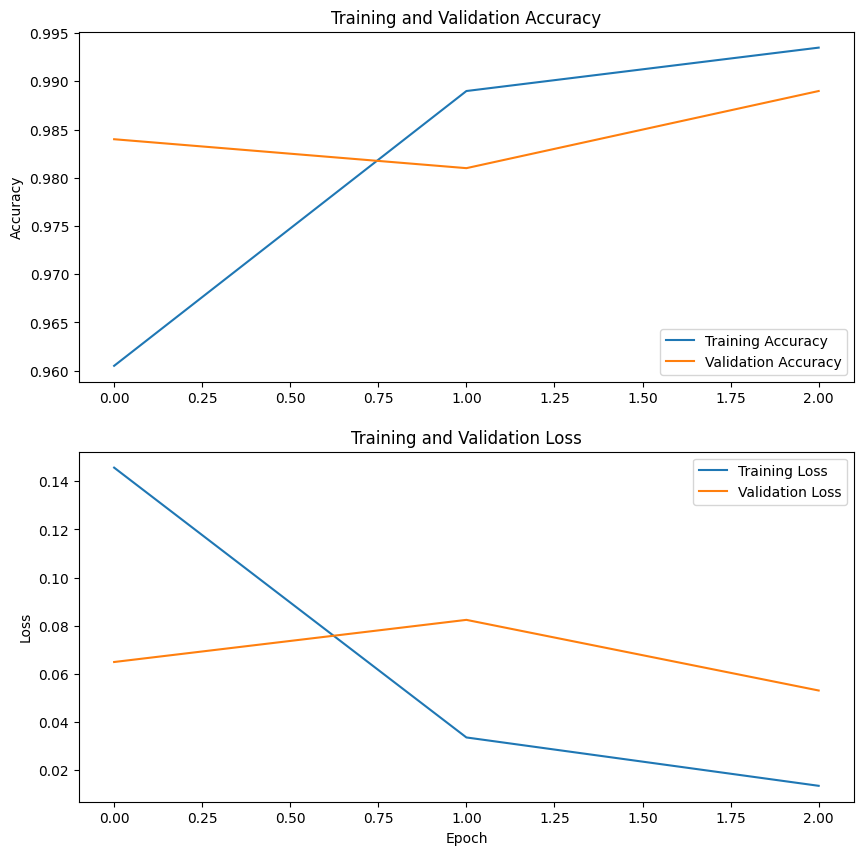

Model being trained is ResNet50 

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - accuracy: 0.5266 - loss: 0.8118 - val_accuracy: 0.5690 - val_loss: 0.7077
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.6033 - loss: 0.6657 - val_accuracy: 0.5770 - val_loss: 0.7155
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.6034 - loss: 0.6787 - val_accuracy: 0.6400 - val_loss: 0.6369
plots for model


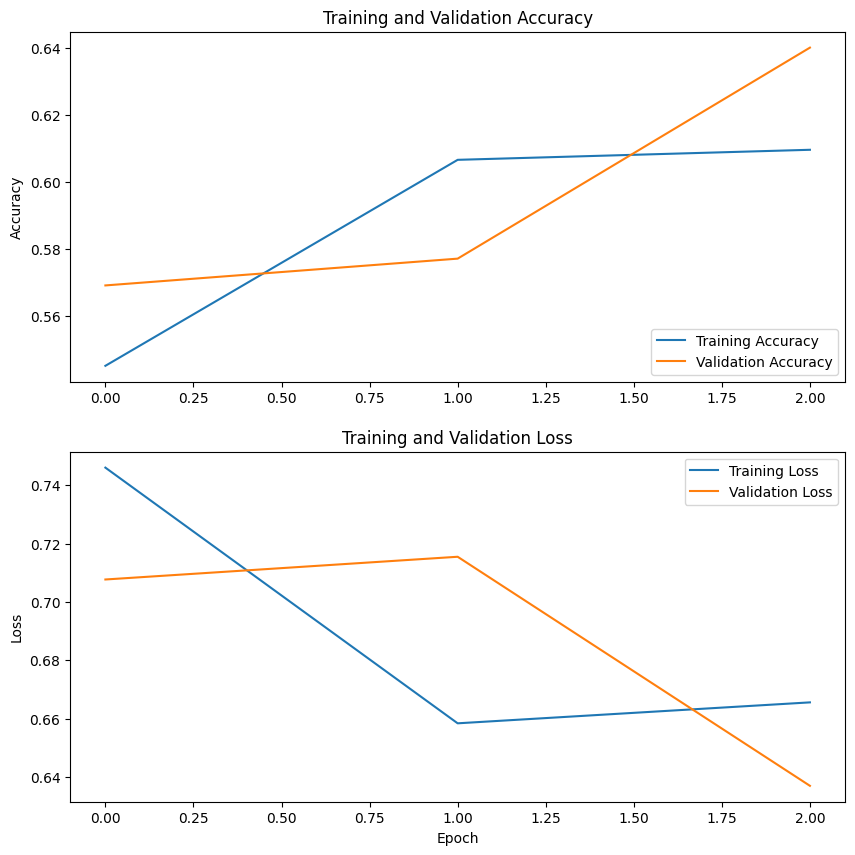

Model being trained is EfficientNetB0 

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 93ms/step - accuracy: 0.4772 - loss: 0.7017 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.4962 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.4959 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6933
plots for model


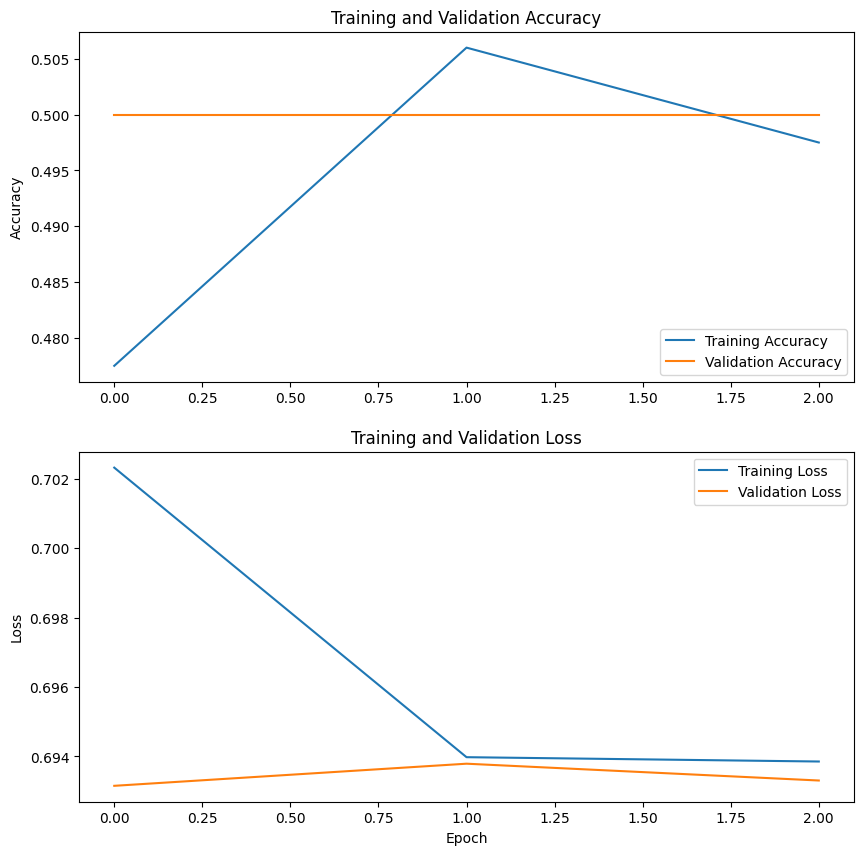

Model being trained is MobileNetV2 

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.9384 - loss: 0.1811 - val_accuracy: 0.9740 - val_loss: 0.0738
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9886 - loss: 0.0369 - val_accuracy: 0.9790 - val_loss: 0.0800
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9897 - loss: 0.0237 - val_accuracy: 0.9770 - val_loss: 0.0832
plots for model


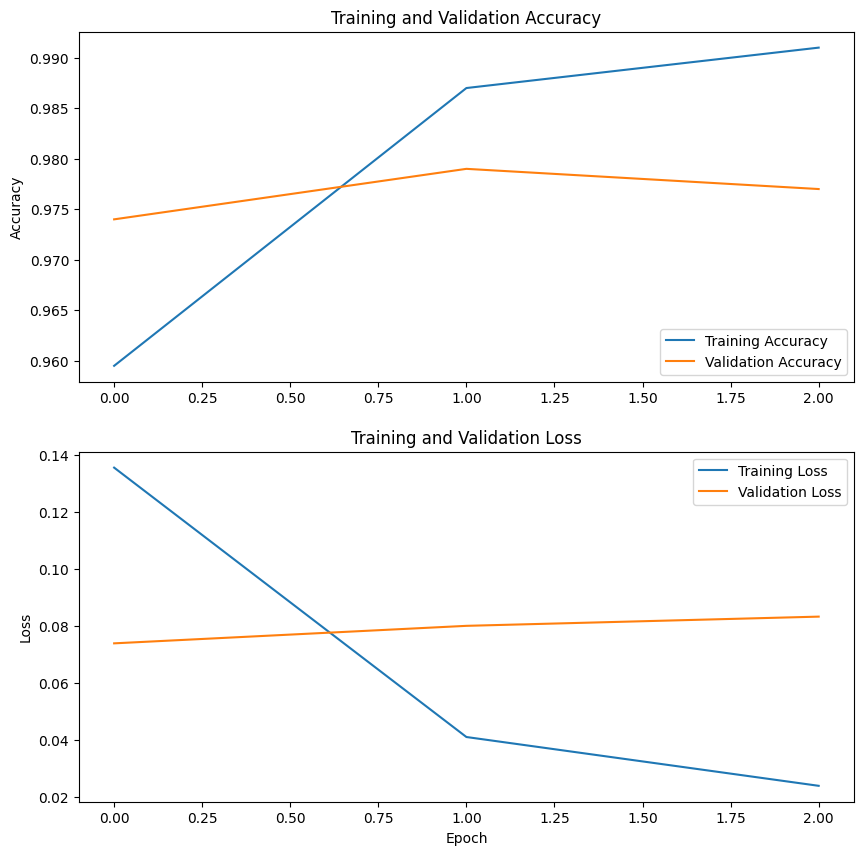

In [114]:
train_models(models)

In [115]:
results = pd.DataFrame(results)
results

,model,accuracy,val_accuracy,loss,val_loss
0,VGG16,0.9105,0.872,0.237654,0.268031
1,InceptionV3,0.9935,0.989,0.013371,0.053006
2,ResNet50,0.6095,0.640,0.665538,0.636910
3,EfficientNetB0,0.4975,0.500,0.693855,0.693307
4,MobileNetV2,0.9910,0.977,0.023854,0.083215


- Based on these results, InceptionV3 and MobileNetV2 are the best candidates for deployment or further tuning